# Extract: 

1. My original data sources (prescriber_info.csv, opioids.csv, and overdoses.csv) are from https://www.kaggle.com/apryor6/us-opiate-prescriptions and (Cause_of_Death_2014.csv) https://wonder.cdc.gov/controller/saved/D77/D97F318. 
2. The data was formatted in csv files 

In [57]:
# import dependencies
import os 
import pandas as pd 
import sqlalchemy
import getpass
import matplotlib.pyplot as plt

In [24]:
# hide password 
upass=getpass.getpass("Enter your password for Postgress:")

Enter your password for Postgress:········


In [1]:
# create path to csv files
path='../ETL_Project/Cause_of_Death_2014_csv.csv'
path2='../ETL_Project/prescriber_info_csv.csv'

In [30]:
# read in csv files
cause_df=pd.read_csv(path)
cause_df.head()

,Notes,State,State Abbrv.,State Code,UCD - Drug/Alcohol Induced,UCD - Drug/Alcohol Induced Code,UCD - Drug/Alcohol Induced Cause,UCD - Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate
0,NaN,Alabama,AL,1.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,639.0,4849377.0,13.2
1,Total,Alabama,AL,1.0,Drug-induced causes,D,NaN,NaN,639.0,4849377.0,13.2
2,Total,Alabama,AL,1.0,NaN,NaN,NaN,NaN,639.0,4849377.0,13.2
3,NaN,Alaska,AK,2.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,103.0,736732.0,14.0
4,Total,Alaska,AK,2.0,Drug-induced causes,D,NaN,NaN,103.0,736732.0,14.0


# Transform: 
1. dropped all null values from cause_df

In [142]:
# drop column notes and null values
cause_clean_df=cause_df.drop(axis=1,labels="Notes").dropna()
cause_clean_df

,State,State Abbrv.,State Code,UCD - Drug/Alcohol Induced,UCD - Drug/Alcohol Induced Code,UCD - Drug/Alcohol Induced Cause,UCD - Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate
0,Alabama,AL,1.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,639.0,4849377.0,13.2
3,Alaska,AK,2.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,103.0,736732.0,14.0
6,Arizona,AZ,4.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,934.0,6731484.0,13.9
9,Arkansas,AR,5.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,251.0,2966369.0,8.5
12,California,CA,6.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,3780.0,38802500.0,9.7
15,Colorado,CO,8.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,679.0,5355866.0,12.7
18,Connecticut,CT,9.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,554.0,3596677.0,15.4
21,Delaware,DE,10.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,152.0,935614.0,16.2
24,District of Columbia,DC,11.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,80.0,658893.0,12.1
27,Florida,FL,12.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,2166.0,19893297.0,10.9


In [120]:
# count total states (includes D.C)
len(cause_clean_df)

51

In [121]:
# export to clean df to Postgres

engine = sqlalchemy.create_engine(
    sqlalchemy.engine.url.URL(
        drivername="postgresql",
        username="postgres",
        password=upass,
        host="localhost",
        port="5432",
        database="ETL_Homework",
    ),
    echo_pool=True,
)

# cause_clean_df.to_sql('cause_of_death', engine)

# Transform (continued)
2. replaced MD to M.D.

In [122]:
# import path 
prescriber_info=pd.read_csv(path2)
prescriber_info.head()

,NPI,Gender,State,Credentials,Specialty,ACETAMINOPHEN.CODEINE,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,TRAMADOL.HCL,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,17,0,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,MD,General Surgery,0,0,182,0,0,0,24,0,0,33,87,0,36,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1669567541,M,AZ,MD,Internal Medicine,43,0,0,0,0,22,146,15,0,229,29,0,90,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,22,22,0,0,0,0,0,0,0,22,0,0,1


In [123]:
# to clean replace MD with M.D. 
prescriber_info['Credentials']=prescriber_info['Credentials'].replace(to_replace='MD',value='M.D.')
prescriber_info.head()

,NPI,Gender,State,Credentials,Specialty,ACETAMINOPHEN.CODEINE,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,TRAMADOL.HCL,Opioid.Prescriber
0,1710982582,M,TX,DDS,Dentist,0,0,17,0,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,M.D.,General Surgery,0,0,182,0,0,0,24,0,0,33,87,0,36,1
2,1427182161,F,NY,M.D.,General Practice,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1669567541,M,AZ,M.D.,Internal Medicine,43,0,0,0,0,22,146,15,0,229,29,0,90,1
4,1679650949,M,NV,M.D.,Hematology/Oncology,0,22,22,0,0,0,0,0,0,0,22,0,0,1


In [124]:
# groupby state 

groupby_prescriber_info=prescriber_info.groupby('State')
df_prescriber=pd.DataFrame(groupby_prescriber_info['ACETAMINOPHEN.CODEINE','FENTANYL','HYDROCODONE.ACETAMINOPHEN','HYDROMORPHONE.HCL','METHADONE.HCL','MORPHINE.SULFATE','MORPHINE.SULFATE.ER','OXYBUTYNIN.CHLORIDE','OXYBUTYNIN.CHLORIDE.ER','OXYCODONE.ACETAMINOPHEN','OXYCODONE.HCL','OXYCONTIN','TRAMADOL.HCL'].count())

df_prescriber.head()

<ipython-input-124-6fb17147d259>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_prescriber=pd.DataFrame(groupby_prescriber_info['ACETAMINOPHEN.CODEINE','FENTANYL','HYDROCODONE.ACETAMINOPHEN','HYDROMORPHONE.HCL','METHADONE.HCL','MORPHINE.SULFATE','MORPHINE.SULFATE.ER','OXYBUTYNIN.CHLORIDE','OXYBUTYNIN.CHLORIDE.ER','OXYCODONE.ACETAMINOPHEN','OXYCODONE.HCL','OXYCONTIN','TRAMADOL.HCL'].count())


,ACETAMINOPHEN.CODEINE,FENTANYL,HYDROCODONE.ACETAMINOPHEN,HYDROMORPHONE.HCL,METHADONE.HCL,MORPHINE.SULFATE,MORPHINE.SULFATE.ER,OXYBUTYNIN.CHLORIDE,OXYBUTYNIN.CHLORIDE.ER,OXYCODONE.ACETAMINOPHEN,OXYCODONE.HCL,OXYCONTIN,TRAMADOL.HCL
State,,,,,,,,,,,,,
AA,1,1,1,1,1,1,1,1,1,1,1,1,1
AE,2,2,2,2,2,2,2,2,2,2,2,2,2
AK,39,39,39,39,39,39,39,39,39,39,39,39,39
AL,344,344,344,344,344,344,344,344,344,344,344,344,344
AR,216,216,216,216,216,216,216,216,216,216,216,216,216


In [53]:
# create a new table in postgres
# prescriber_info.to_sql('prescriber_info',engine)

# Load:
1. from prescriber_info show state vs narcotics prescribed then compare to cause_clean_df deaths vs. state

2. from prescriber_info show gender vs narcotics 


The opioid pandemic in our country is dangerous and should be taken seriously, which is why I decided to conduct this analysis. 

Based on the graphs below there is a clear coorelation between the opioids prescribed and the death toll per state. As we can see, California had about 500 more opioid prescriptions compared to New York. However CA had about 1500 more deaths compared to NY. 

CA and NY have the greatest population, therefore logically it makes sense that they have the greatest amount of prescribed opioids. However, the issue is clear; 500 more prescriptions should not result in almost double the death rate. 

In [143]:
cause_clean_df.head()

,State,State Abbrv.,State Code,UCD - Drug/Alcohol Induced,UCD - Drug/Alcohol Induced Code,UCD - Drug/Alcohol Induced Cause,UCD - Drug/Alcohol Induced Cause Code,Deaths,Population,Crude Rate
0,Alabama,AL,1.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,639.0,4849377.0,13.2
3,Alaska,AK,2.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,103.0,736732.0,14.0
6,Arizona,AZ,4.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,934.0,6731484.0,13.9
9,Arkansas,AR,5.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,251.0,2966369.0,8.5
12,California,CA,6.0,Drug-induced causes,D,Drug poisonings (overdose) Unintentional (X40-...,D1,3780.0,38802500.0,9.7


In [160]:
cause_clean_df2=cause_clean_df.drop(axis=1,labels=['Population','State Code','State','Crude Rate','UCD - Drug/Alcohol Induced Cause Code','UCD - Drug/Alcohol Induced Cause','UCD - Drug/Alcohol Induced Code'])
cause_clean_df2.head()

,State Abbrv.,UCD - Drug/Alcohol Induced,Deaths
0,AL,Drug-induced causes,639.0
3,AK,Drug-induced causes,103.0
6,AZ,Drug-induced causes,934.0
9,AR,Drug-induced causes,251.0
12,CA,Drug-induced causes,3780.0


In [162]:
index_cause=cause_clean_df2.set_index('State Abbrv.')
index_cause.head()

,UCD - Drug/Alcohol Induced,Deaths
State Abbrv.,,
AL,Drug-induced causes,639.0
AK,Drug-induced causes,103.0
AZ,Drug-induced causes,934.0
AR,Drug-induced causes,251.0
CA,Drug-induced causes,3780.0


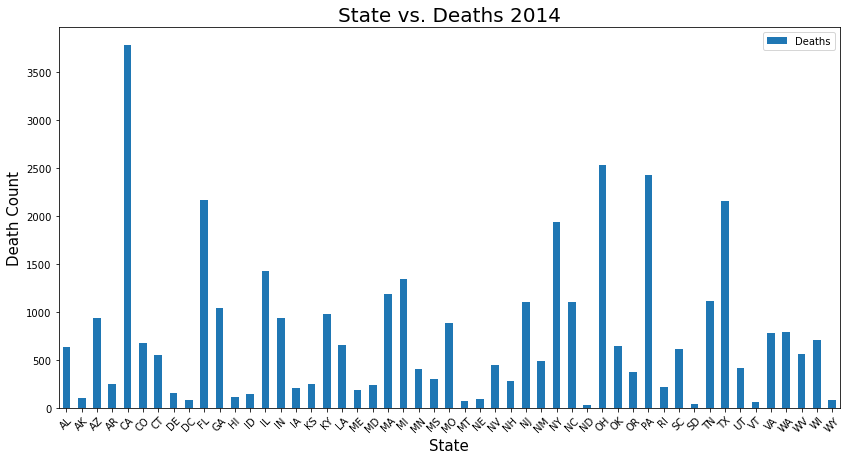

In [170]:
# graph state vs death
graph_cause=index_cause.plot(kind='bar',figsize=(14,7), rot=45)

plt.title('State vs. Deaths 2014', size=20)
plt.xlabel('State', size=15)
plt.ylabel('Death Count', size=15)

plt.show()

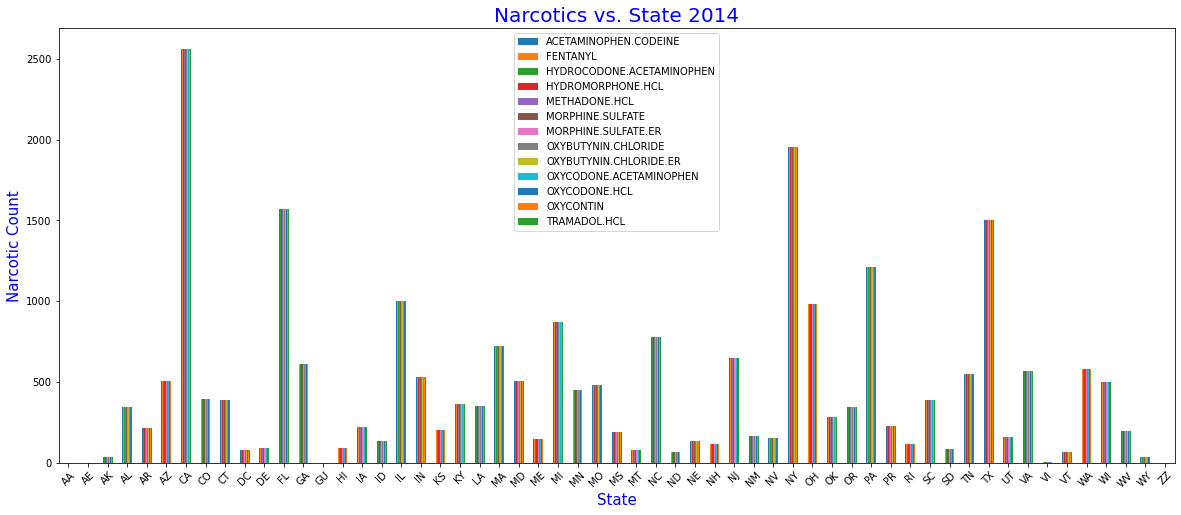

In [168]:
graph_prescriber_info=df_prescriber.plot(kind='bar', figsize=(20,8), rot=45)

plt.title('Narcotics vs. State 2014', size=20, color='blue')
plt.xlabel("State", size=15, color='blue')
plt.ylabel("Narcotic Count", size=15, color='blue')


plt.show()